In [1]:
import json
import os
import pandas as pd
import numpy as np
    
RAW_FOLDER = "raw"
PROCESSED_FOLDER = "processed"
RETRY_FOLDER = "retry"

    
def write_dict_into_json(dictionary, filename):
    with open(filename, "w") as write_file:
        json.dump(dictionary, write_file, indent=4)
        
        
RULES_EXTRACTION = {
        "id": lambda x: x['id'],
        "rating": lambda x: x['rating'],
        'comments': lambda x: x['comments'],
        "localized_comments": lambda x: x['localizedReview']['comments'],
        'response': lambda x: x['response'],
        "localized_response": lambda x: x['localizedReview']['response'],
        'language':lambda x: x['language'],
        'created_at':lambda x: x['createdAt'],
        'localized_date': lambda x: x['localizedDate'],
        'reviewee_id': lambda x: x['reviewee']['id'],
        'reviewee_first_name': lambda x: x['reviewee']['firstName'],
        'reviewee_host_name': lambda x: x['reviewee']['hostName'],
        'reviewee_is_superhost': lambda x: x['reviewee']['isSuperhost'],
        'reviewee_picture_url': lambda x: x['reviewee']['pictureUrl'],
        'reviewer_id': lambda x: x['reviewer']['id'],
        'reviewer_first_name': lambda x: x['reviewer']['firstName'],
        'reviewer_host_name': lambda x: x['reviewer']['hostName'],
        'reviewer_is_superhost': lambda x: x['reviewer']['isSuperhost'],
        'reviewer_picture_url': lambda x: x['reviewer']['pictureUrl'],
}


def extract_features_from_review(review, rules):
    features_dict = {}
    for feature in rules:
        try:
            features_dict[feature] = rules[feature](review)
        except Exception as e:
            features_dict[feature] = None

    return features_dict

# Reviews

In [2]:
f_name = f"../../data/{PROCESSED_FOLDER}/all_reviews_counts.json"
all_reviews_counts_df = pd.read_json(f_name)
all_reviews_counts_df

,listing_id,reviews_count
0,41893693,0
1,715912590743776256,1
2,731385661865594240,1
3,48816721,91
4,52228932,43
...,...,...
25762,729500954000263808,1
25763,22994463,45
25764,41429604,27
25765,22870845,124


In [3]:
all_reviews_counts_df['listing_id'] = all_reviews_counts_df['listing_id'].astype(str)
all_reviews_counts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25767 entries, 0 to 25766
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     25767 non-null  object
 1   reviews_count  25767 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 402.7+ KB


In [4]:
zero_reviews_counts = all_reviews_counts_df[all_reviews_counts_df['reviews_count'] == 0]['listing_id'].to_list()
len(zero_reviews_counts)

4466

In [5]:
all_reviews_counts_df['reviews_count'].sum()

1470202

## Reviews
Part1

In [6]:
f = open(f"../../data/{RAW_FOLDER}/compiled_reviews.json")
compiled_reviews = json.load(f)


In [7]:
len(compiled_reviews.keys())

25767

In [8]:
compiled_reviews['33211498']

[{'__typename': 'MerlinPdpReviewForP3',
  'collectionTag': None,
  'comments': 'A lovely, relaxing stay .  Comfortable beds and everything we needed. This house felt homely and peaceful. <br/>Children enjoyed the tennis courts and the hot tub and the visits from Catherine’s dog .',
  'id': '704892038167035212',
  'language': 'en',
  'createdAt': '2022-08-30T13:34:39Z',
  'reviewee': {'__typename': 'MerlinPdpUserForP3Reviews',
   'deleted': False,
   'firstName': 'Catherine',
   'hostName': 'Catherine',
   'id': '25579014',
   'pictureUrl': 'https://a0.muscache.com/im/pictures/user/ee977b7d-7e76-4041-b5bb-4f3bfcd0845d.jpg?aki_policy=profile_x_medium',
   'profilePath': '/users/show/25579014',
   'isSuperhost': False,
   'userProfilePicture': {'__typename': 'MerlinImage',
    'baseUrl': 'https://a0.muscache.com/im/pictures/user/ee977b7d-7e76-4041-b5bb-4f3bfcd0845d.jpg?aki_policy=profile_x_medium',
    'onPressAction': {'__typename': 'MerlinNavigateToUserProfile',
     'url': '/users/show

In [87]:
all_reviews = []
i = 0
for listing_id in list(compiled_reviews.keys()):
    reviews = compiled_reviews[listing_id]
    i += len(reviews)
    try:
        for review in reviews:
            features_from_review = extract_features_from_review(review, RULES_EXTRACTION)
            features_dict = {}
            features_dict['listing_id'] = listing_id
            features_all = {**features_dict, **features_from_review }
            all_reviews.append(features_all)
    except Exception as e:
        print(e)
        pass

In [88]:
print(i)
len(all_reviews)
all_reviews_df = pd.DataFrame(all_reviews)

1463515


1463515

In [90]:
all_reviews_df = pd.DataFrame(all_reviews)

In [91]:
all_reviews_df.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1463515 entries, 0 to 1463514
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   listing_id             1463515 non-null  object
 1   id                     1463515 non-null  object
 2   rating                 1463515 non-null  int64 
 3   comments               1463515 non-null  object
 4   localized_comments     445978 non-null   object
 5   response               167529 non-null   object
 6   localized_response     40948 non-null    object
 7   language               1463268 non-null  object
 8   created_at             1463515 non-null  object
 9   localized_date         1463515 non-null  object
 10  reviewee_id            1463515 non-null  object
 11  reviewee_first_name    1463515 non-null  object
 12  reviewee_host_name     1463515 non-null  object
 13  reviewee_is_superhost  1463515 non-null  bool  
 14  reviewee_picture_url   1463515 non

In [93]:
all_reviews_df.duplicated(subset=['id']).sum()

1

In [100]:
all_reviews_df = all_reviews_df.drop_duplicates(subset=['id'])
all_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463514 entries, 0 to 1463514
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   listing_id             1463514 non-null  object
 1   id                     1463514 non-null  object
 2   rating                 1463514 non-null  int64 
 3   comments               1463514 non-null  object
 4   localized_comments     445977 non-null   object
 5   response               167529 non-null   object
 6   localized_response     40948 non-null    object
 7   language               1463267 non-null  object
 8   created_at             1463514 non-null  object
 9   localized_date         1463514 non-null  object
 10  reviewee_id            1463514 non-null  object
 11  reviewee_first_name    1463514 non-null  object
 12  reviewee_host_name     1463514 non-null  object
 13  reviewee_is_superhost  1463514 non-null  bool  
 14  reviewee_picture_url   1463514 non

In [128]:
# all_reviews_df.to_csv("temp_all_reviews.csv", index=False)

In [103]:
counts_by_listing_id = all_reviews_df.groupby('listing_id')['id'].count()
counts_by_listing_id = counts_by_listing_id.reset_index()
counts_by_listing_id = counts_by_listing_id.rename(columns={'id': 'scraped_count'})
counts_by_listing_id['scraped_count'] = counts_by_listing_id['scraped_count'].fillna(value=0)

In [104]:
counts_by_listing_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21265 entries, 0 to 21264
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     21265 non-null  object
 1   scraped_count  21265 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 332.4+ KB


In [182]:
merge_df = all_reviews_counts_df.merge(counts_by_listing_id, how='left', on='listing_id')
merge_df['scraped_count'] = merge_df['scraped_count'].fillna(value=0)
for col in ['scraped_count', 'reviews_count']:
    merge_df[col] = merge_df[col].astype(int)
merge_df.info()
# write_dict_into_json(retry_listing_ids_df['listing_id'].to_list(),'retry_listing_ids.json')
# retry_listing_ids_df.to_csv("retry_listing.csv",index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25767 entries, 0 to 25766
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     25767 non-null  object
 1   reviews_count  25767 non-null  int64 
 2   scraped_count  25767 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 805.2+ KB


In [183]:
merge_df[(merge_df['reviews_count'] != merge_df['scraped_count'])]

,listing_id,reviews_count,scraped_count
1,715912590743776256,1,0
2,731385661865594240,1,0
7,39271715,45,44
8,28618886,172,171
13,46033156,111,110
...,...,...,...
25753,619129408914754432,14,0
25756,33190911,516,515
25759,681566033839380096,11,0
25762,729500954000263808,1,0


In [117]:
retry_listing_ids_df = merge_df[(merge_df['reviews_count'] != merge_df['scraped_count'])]
print(len(retry_listing_ids_df))
retry_listing_ids_df.info()

5181
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5181 entries, 1 to 25766
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   listing_id     5181 non-null   object 
 1   reviews_count  5181 non-null   int64  
 2   scraped_count  5181 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.9+ KB


In [138]:
retry_listing_ids_df = merge_df[(merge_df['reviews_count'] != merge_df['scraped_count'])]
retry_listing_ids_df

,listing_id,reviews_count,scraped_count
1,715912590743776256,1,0.0
2,731385661865594240,1,0.0
7,39271715,45,44.0
8,28618886,172,171.0
13,46033156,111,110.0
...,...,...,...
25753,619129408914754432,14,0.0
25756,33190911,516,515.0
25759,681566033839380096,11,0.0
25762,729500954000263808,1,0.0


#### retry part

In [123]:
f = open(f"../../data/{RAW_FOLDER}/compiled_retry_reviews.json")
compiled_retry_reviews = json.load(f)

In [145]:
retry_reviews = []
i = 0
for listing_id in list(compiled_retry_reviews.keys()):
    temp = compiled_retry_reviews[listing_id]
    try:
        reviews = temp['reviews']
        i += len(reviews)
        for review in reviews:
            features_from_review = extract_features_from_review(review, RULES_EXTRACTION)
            features_dict = {}
            features_dict['listing_id'] = listing_id
            features_all = {**features_dict, **features_from_review }
            retry_reviews.append(features_all)
    except Exception as e:
        print(e)
        pass

In [146]:
print(i)
len(retry_reviews)

325802


325802

In [149]:
retry_reviews_df = pd.DataFrame(retry_reviews)
retry_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325802 entries, 0 to 325801
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   listing_id             325802 non-null  object
 1   id                     325802 non-null  object
 2   rating                 325802 non-null  int64 
 3   comments               325802 non-null  object
 4   localized_comments     88847 non-null   object
 5   response               34311 non-null   object
 6   localized_response     7842 non-null    object
 7   language               325788 non-null  object
 8   created_at             325802 non-null  object
 9   localized_date         325802 non-null  object
 10  reviewee_id            325802 non-null  object
 11  reviewee_first_name    325802 non-null  object
 12  reviewee_host_name     325802 non-null  object
 13  reviewee_is_superhost  325802 non-null  bool  
 14  reviewee_picture_url   325802 non-null  object
 15  

In [151]:
retry_counts_by_listing_id = retry_reviews_df.groupby('listing_id')['id'].count()
retry_counts_by_listing_id = retry_counts_by_listing_id.reset_index()
retry_counts_by_listing_id = retry_counts_by_listing_id.rename(columns={'id': 'retry_scraped_count'})
retry_counts_by_listing_id['retry_scraped_count'] = retry_counts_by_listing_id['retry_scraped_count'].fillna(value=0)
retry_counts_by_listing_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2174 entries, 0 to 2173
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   listing_id           2174 non-null   object
 1   retry_scraped_count  2174 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.1+ KB


In [155]:
retry_reviews_counts = []
i = 0
for listing_id in list(compiled_retry_reviews.keys()):
    temp = compiled_retry_reviews[listing_id]
    i += 1
    try:
        features_dict = {}
        features_dict['listing_id'] = listing_id
        features_dict['retry_reviews_count'] = temp['reviews_count']
        features_all = {**features_dict }
        retry_reviews_counts.append(features_all)
    except Exception as e:
        print(e)
        pass

In [156]:
print(i)
len(retry_reviews_counts)

5181


5181

In [157]:
retry_reviews_counts_df = pd.DataFrame(retry_reviews_counts)
retry_reviews_counts_df

,listing_id,retry_reviews_count
0,689933056607851264,0
1,21714087,355
2,26026904,115
3,7241425,689
4,21887079,113
...,...,...
5176,576565208470473472,0
5177,50779834,22
5178,689044212757009536,0
5179,42637728,131


In [158]:
retry_merge_df = retry_reviews_counts_df.merge(retry_counts_by_listing_id, how='left', on='listing_id')
retry_merge_df['retry_scraped_count'] = retry_merge_df['retry_scraped_count'].fillna(value=0)
retry_merge_df

,listing_id,retry_reviews_count,retry_scraped_count
0,689933056607851264,0,0.0
1,21714087,355,355.0
2,26026904,115,115.0
3,7241425,689,689.0
4,21887079,113,113.0
...,...,...,...
5176,576565208470473472,0,0.0
5177,50779834,22,22.0
5178,689044212757009536,0,0.0
5179,42637728,131,131.0


In [172]:
compare_df = retry_merge_df.merge(retry_listing_ids_df, how='left', on='listing_id')
for col in ['retry_reviews_count', 'retry_scraped_count', 'reviews_count', 'scraped_count']:
    compare_df[col] = compare_df[col].astype(int)
compare_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5181 entries, 0 to 5180
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   listing_id           5181 non-null   object
 1   retry_reviews_count  5181 non-null   int64 
 2   retry_scraped_count  5181 non-null   int64 
 3   reviews_count        5181 non-null   int64 
 4   scraped_count        5181 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 242.9+ KB


In [218]:
compare_df[(compare_df['retry_scraped_count'] > compare_df['scraped_count']) & (compare_df['retry_reviews_count'] != compare_df['retry_scraped_count'])]

,listing_id,retry_reviews_count,retry_scraped_count,reviews_count,scraped_count
710,4194211,212,182,212,35
1143,28446050,59,56,57,55
1635,8341784,141,84,141,28
1658,5298896,210,49,210,7


In [199]:
compare_df[(compare_df['retry_reviews_count'] != compare_df['retry_scraped_count'])]

,listing_id,retry_reviews_count,retry_scraped_count,reviews_count,scraped_count
27,1217318,716,105,714,712
183,41613884,224,63,224,222
453,8792092,185,98,184,183
465,6394896,361,315,361,360
560,28091104,115,0,115,114
...,...,...,...,...,...
4290,129351,271,217,271,269
4669,23076512,114,42,114,113
4707,26024664,498,406,498,495
4857,32187171,315,42,313,314


In [200]:
retry2_listing_ids = compare_df[(compare_df['retry_reviews_count'] != compare_df['retry_scraped_count'])]['listing_id'].to_list()
len(retry2_listing_ids)
write_dict_into_json(retry2_listing_ids , "retry2_listing_ids.json")

#### retry2 part

In [13]:
f = open(f"../../data/{RAW_FOLDER}/compiled_retry2_reviews.json")
compiled_retry2_reviews = json.load(f)
retry2_reviews = []
i = 0
for listing_id in list(compiled_retry2_reviews.keys()):
    temp = compiled_retry2_reviews[listing_id]
    try:
        reviews = temp['reviews']
        i += len(reviews)
        for review in reviews:
            features_from_review = extract_features_from_review(review, RULES_EXTRACTION)
            features_dict = {}
            features_dict['listing_id'] = listing_id
            features_all = {**features_dict, **features_from_review }
            retry2_reviews.append(features_all)
    except Exception as e:
        print(e)
        pass
        
print(i)
print(len(retry2_reviews))
retry2_reviews_df = pd.DataFrame(retry2_reviews)
retry2_reviews_df.info()

42062
42062
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42062 entries, 0 to 42061
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   listing_id             42062 non-null  object
 1   id                     42062 non-null  object
 2   rating                 42062 non-null  int64 
 3   comments               42062 non-null  object
 4   localized_comments     10806 non-null  object
 5   response               4967 non-null   object
 6   localized_response     1367 non-null   object
 7   language               42061 non-null  object
 8   created_at             42062 non-null  object
 9   localized_date         42062 non-null  object
 10  reviewee_id            42062 non-null  object
 11  reviewee_first_name    42062 non-null  object
 12  reviewee_host_name     42062 non-null  object
 13  reviewee_is_superhost  42062 non-null  bool  
 14  reviewee_picture_url   42062 non-null  object
 15  reviewe

In [207]:
unique_reviewee_ids = all_reviews_df['reviewee_id'].unique()
len(unique_reviewee_ids)

17249

In [210]:
unique_reviewer_ids = all_reviews_df['reviewer_id'].unique()
len(unique_reviewer_ids)

1378157

In [ ]:
intersection = []
total = 0
for value in unique_reviewee_ids:
    if value in unique_reviewer_ids:
        intersection.append(value)
        total += 1
        print(total)

len(intersection)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


# Listing

In [2]:
f = open(f"../../data/{PROCESSED_FOLDER}/all_unique_listing_ids.json")
all_unique_listing_ids = json.load(f)
len(all_unique_listing_ids)

25767

In [3]:
f = open(f"../../data/{RETRY_FOLDER}/for_listing/unique_listing_ids_from_all_reviews.json")
unique_listing_ids_from_all_reviews = json.load(f)['listing_ids']
len(unique_listing_ids_from_all_reviews)

21266

In [4]:
directory = f"../../data/{RAW_FOLDER}/listing/temp_detail"
one_pass = []
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f) and "listing_detail" in filename:
        try:
            _id = filename.split("listing_detail_")[1].split('.')[0]
            one_pass.append(_id)
        except Exception as e:
            print(e)
print(len(one_pass))

21148


In [5]:
print(len(set(one_pass)))
print(len(set(unique_listing_ids_from_all_reviews)))
print(len(set(unique_listing_ids_from_all_reviews).intersection(set(one_pass))))
missing_listing_ids = [i for i in unique_listing_ids_from_all_reviews if i not in one_pass]
print(len(missing_listing_ids))

21148
21266
17588
3678


In [6]:
directory = f"../../data/{RAW_FOLDER}/listing/detail2"
two_pass = []
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f) and "listing_detail" in filename:
        try:
            _id = filename.split("listing_detail_")[1].split('.')[0]
            two_pass.append(_id)
        except Exception as e:
            print(e)
print(len(two_pass))

3548


In [11]:
missing_listing_ids_from_two_pass = [i for i in missing_listing_ids if i not in two_pass]
print(len(missing_listing_ids_from_two_pass))
write_dict_into_json({"listing_ids":missing_listing_ids_from_two_pass}, "missing_listing_ids_from_two_pass.json")

130


In [10]:
missing_listing_ids_from_two_pass[100]

'23910207'

### Part 2

In [73]:
reviews_count_by_reviewer_id = all_reviews_df.groupby('reviewer_id')['id'].count()

In [75]:
reviews_count_by_reviewer_id = reviews_count_by_reviewer_id.reset_index()
reviews_count_by_reviewer_id = reviews_count_by_reviewer_id.rename(columns={'id': 'reviews_count'})
reviews_count_by_reviewer_id

,reviewer_id,reviews_count
0,10000006,1
1,10000028,1
2,100000329,1
3,100000467,1
4,100000510,1
...,...,...
1378152,9999889,3
1378153,99999065,1
1378154,9999939,1
1378155,9999948,1


In [84]:
new = reviews_count_by_reviewer_id[reviews_count_by_reviewer_id['reviews_count'] > 1]
new.describe()

,reviews_count
count,71709.000000
mean,2.190339
std,0.739451
min,2.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,73.000000


<AxesSubplot: >

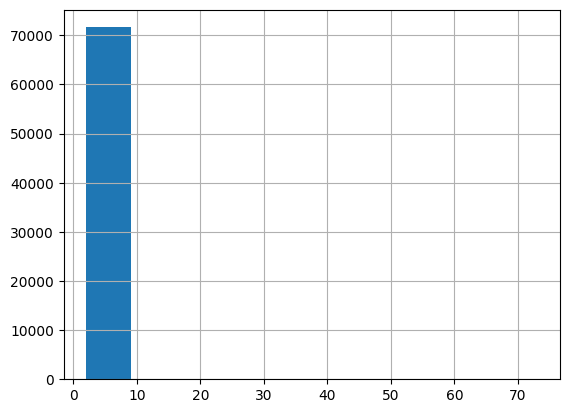

In [85]:
new['reviews_count'].hist()

In [86]:
new['reviews_count'].value_counts()

2     62412
3      7046
4      1467
5       393
6       158
7        95
8        35
9        26
10       16
11       13
12       12
13        8
16        6
18        3
15        3
19        2
23        2
14        2
20        2
26        2
22        1
17        1
73        1
24        1
27        1
32        1
Name: reviews_count, dtype: int64